In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ok so I asked Soomin to run a naive Bayes classifier on some labeled data and to use the labeled words from those analyses to get positive-negative rankings for each word and then to calculate the average sentiment of each Tweet in our experiment. Positive values indicate more positive sentiments (and likewise for negative)

First, a helper function to identify the emotion of each Tweet

In [4]:
def find_emotion(x):
    if (':)' in x) or (':-)' in x) or (': )' in x):
        return 'Pos'
    elif (':(' in x) or (':-(' in x) or (': (' in x): 
        return 'Neg'
    else:
        return 'Neut'

## Original Tweets

,tweet,sent,emot
0,get vote wi tomorrow! rt @michellemalki...,-0.016316,Neut
1,"friday, octob 19th - talib kweli: idl warship...",0.758229,Neut
2,bueno aires--argentina late wednesday approv ...,-0.292872,Neut
3,at vitali klitschko parti udar meet odess...,-0.013599,Neut
4,i saw kayvan novak tonight aka phonejack aka ...,0.279683,Neut


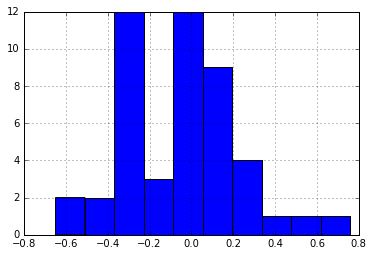

In [6]:
# data_v1-Accidentally collected rough pilot data
# data_v2-Not all of data
# data_v3-Not all of data
obs_df=pd.read_csv('data_v3/obs_tweet_score.csv',header=None)
obs_df.columns=['tweet','sent']
obs_df.loc[:,'emot']=obs_df.loc[:,'tweet'].apply(find_emotion)
obs_df.sent.hist()
obs_df.head()

In [7]:
obs_emotions=obs_df.loc[:,['sent','emot']].groupby('emot')

obs_mean=obs_emotions.mean().reset_index()
obs_sem=obs_emotions.std().divide(np.sqrt(obs_emotions.size()),axis=0).reset_index()

obs_group=pd.merge(obs_mean,obs_sem,on='emot')
obs_group.columns=['emot','mean','sem']
obs_group

,emot,mean,sem
0,Neut,-0.048352,0.040132


Ok, no initial difference in emotional valence, which makes sense since these were neutral tweets we gave random emotions

## Recalled Tweets

,tweet,sent,iter,emot
0,dramat comeback @crunchtimeatkansa :-),0.000000,1,Pos
1,get vote wi @ : (,0.182239,1,Neg
2,rumor bjp clear air sourc say day l...,-0.287803,1,Neut
3,@yo nava go . go banana,0.270888,1,Neut
4,"owner donat $67,000 ticket @statefair ...",0.858460,1,Neut


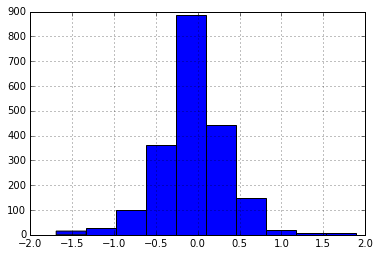

In [8]:
resp_df=pd.read_csv('data_v3/rec_tweet_score.csv',header=None)
resp_df.columns=['tweet','sent','iter']
resp_df.loc[:,'emot']=resp_df.loc[:,'tweet'].apply(find_emotion)

resp_df.sent.hist()
resp_df.head()

In [12]:
resp_emotions=resp_df.loc[:,['sent','emot']].groupby('emot')

resp_mean=resp_emotions.mean().reset_index()
resp_sem=resp_emotions.std().divide(np.sqrt(resp_emotions.size()),axis=0).reset_index()

resp_group=pd.merge(resp_mean,resp_sem,on='emot')
resp_group.columns=['emot','mean','sem']
resp_group

,emot,mean,sem
0,Neg,-0.027293,0.015368
1,Neut,-0.093539,0.015918
2,Pos,-0.026534,0.014681


In [16]:
resp_emotions=resp_df.loc[:,['sent','emot','iter']].groupby(['emot','iter']).mean()
resp_emotions

sent
emot iter          
Neg  1    -0.059664
     2    -0.012408
     3    -0.013820
     4    -0.031563
     5    -0.033087
     6    -0.027587
     7    -0.009611
Neut 1    -0.081218
     2    -0.091313
     3    -0.098073
     4    -0.093121
     5    -0.101036
     6    -0.111520
     7    -0.082378
Pos  1     0.021412
     2    -0.013520
     3    -0.013385
     4    -0.041440
     5    -0.044212
     6    -0.047202
     7    -0.071867

Hmmm doesn't seem like we're seeing an effect here. I think there's something my emotion identification code is missing because the number of Tweets from each category becomes imbalanced. These might be the recalled Tweets without the next iteration processing set up?

Notes to self:
* Need to check with Soomin about what iteration this is
* I think my emotion identfication code is off. check what's up with that

In [16]:
print resp_emotions.size()
print obs_emotions.size()

emot
Neg      40
Neut     93
Pos     104
dtype: int64
emot
Neut    47
dtype: int64
